<a href="https://colab.research.google.com/github/Josh1313/Python_preprocesing/blob/main/EDA_BMW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Bmw_data_preproceamiento/bmw_pricing_v2.csv")

In [ ]:
pd.options.display.float_format = '{:.0f}'.format

**El objetivo es aprender el EDA  explanatory data analisis( analisis exploratoria del data)






 Paso 1 del EDA es ver la informacion basica del contenido ,si

son categoricos, numericos, booleanas, cuantos registros trae el tamano, aplicare los siguiente .info(),describe(),head().shape

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4841 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               4842 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4831 non-null   object 
 7   tipo_coche                   4834 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4841 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  4839 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [ ]:
df.describe()

,km,potencia,precio
count,4841,4842,4837
mean,140959,129,15832
std,60209,39,9223
min,-64,0,100
25%,102884,100,10800
50%,141080,120,14200
75%,175217,135,18600
max,1000376,423,178500


In [ ]:
df.shape

(4843, 18)

In [ ]:
df.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


In [ ]:
len(df[df.duplicated()])

0

In [ ]:
df.isnull().sum()

marca                           2
modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
dtype: int64

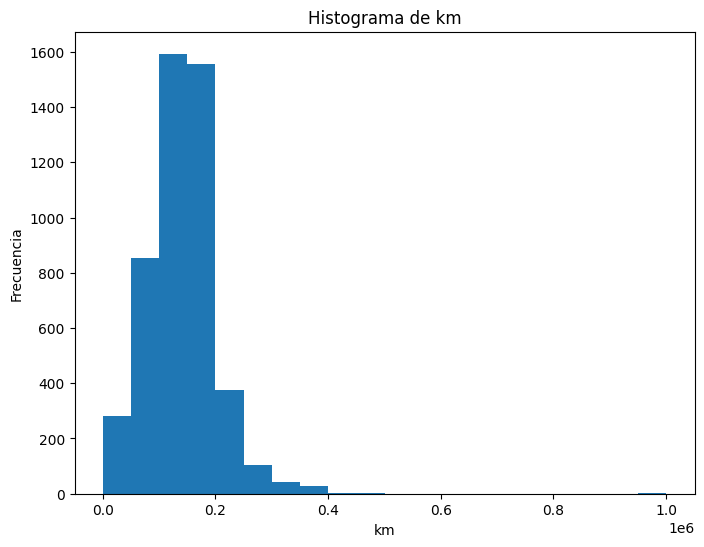

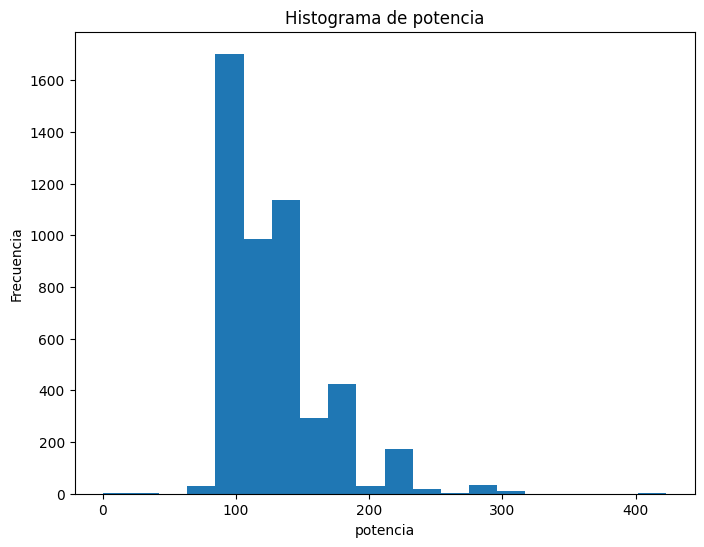

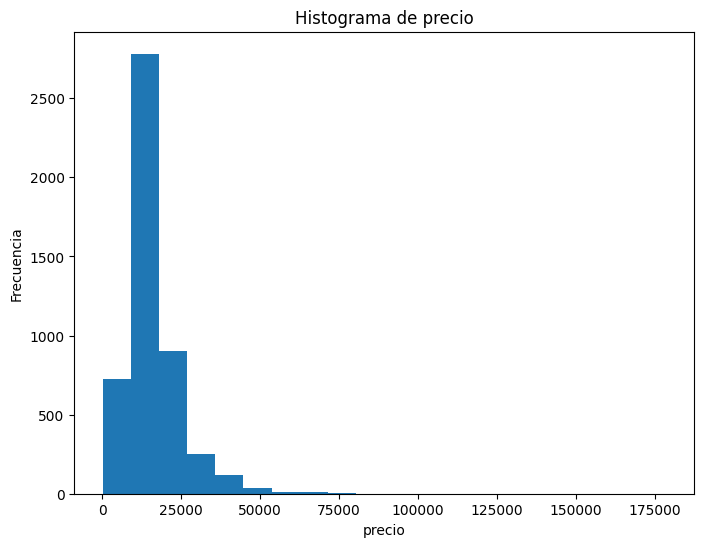

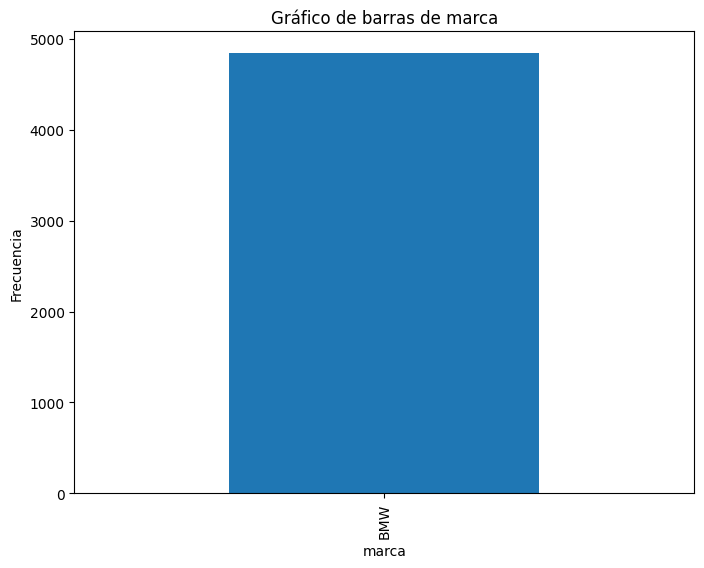

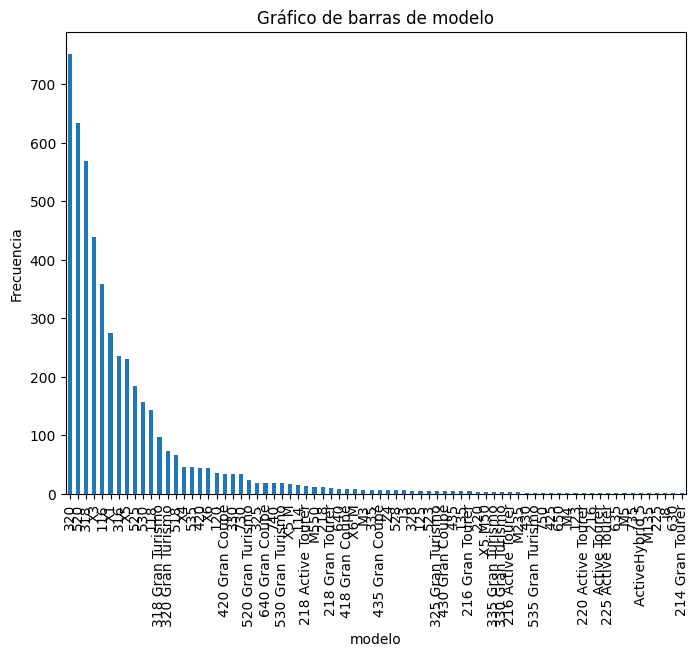

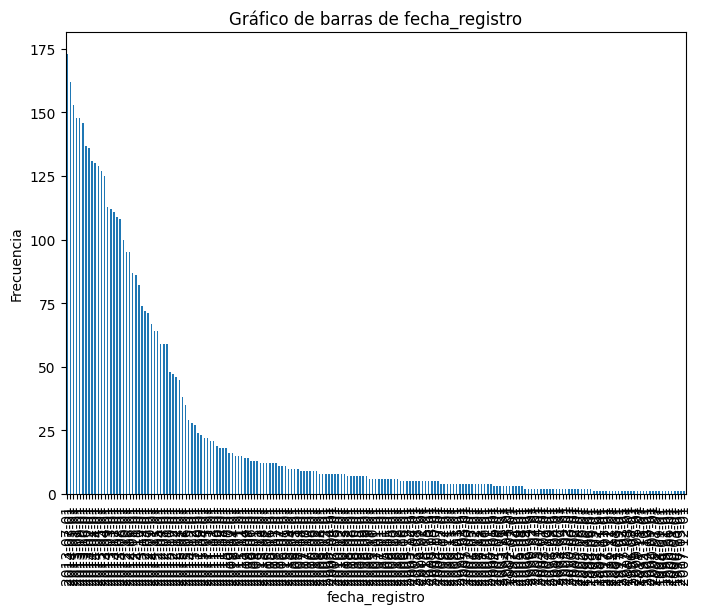

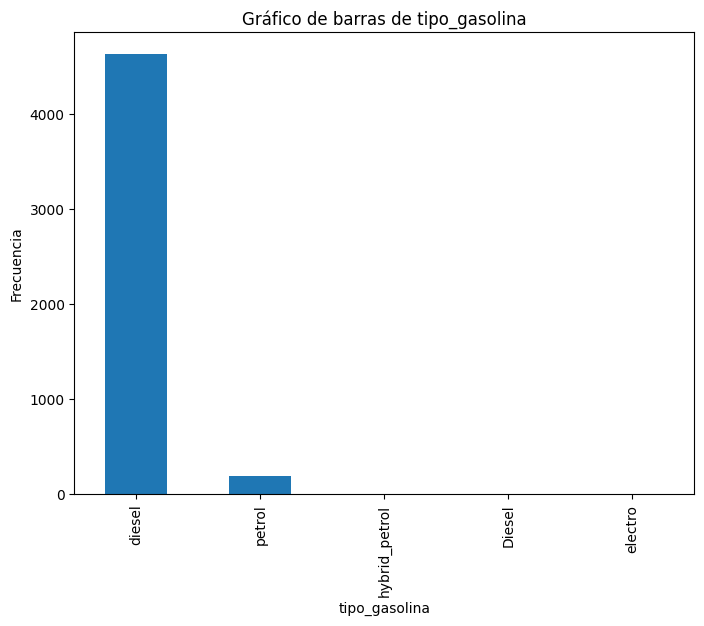

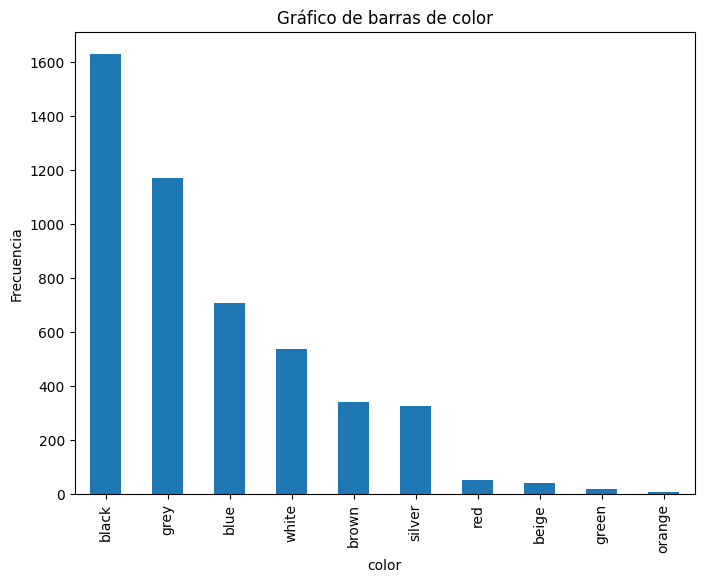

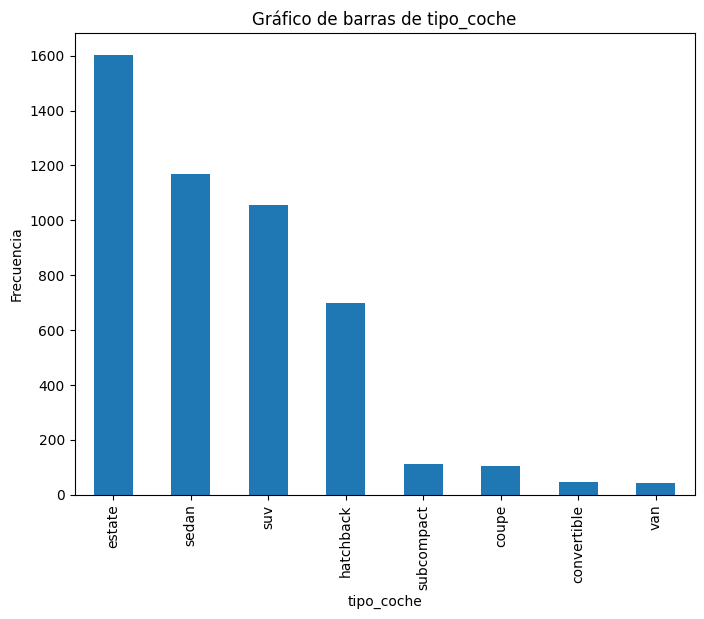

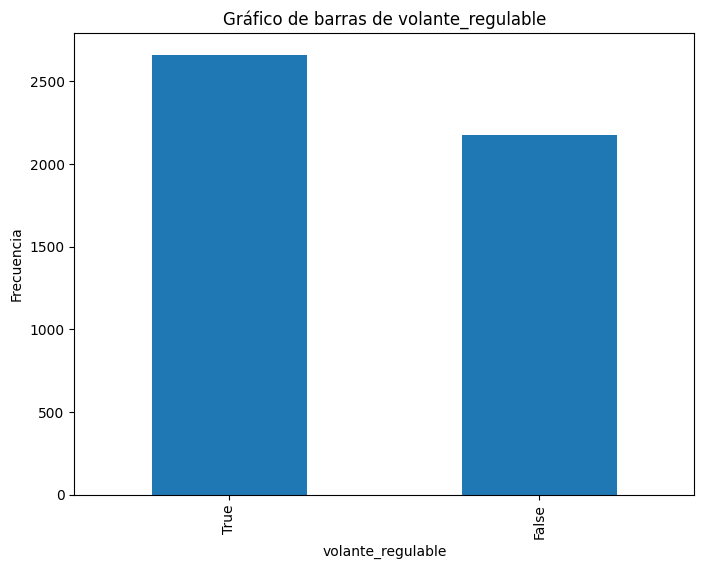

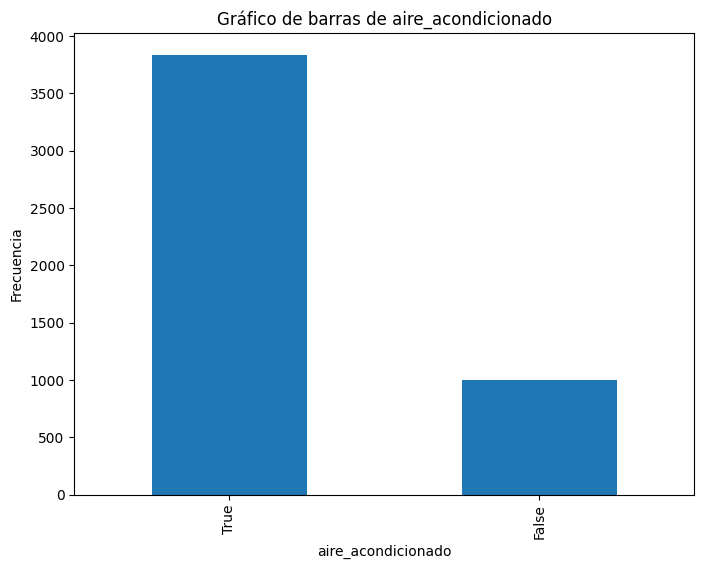

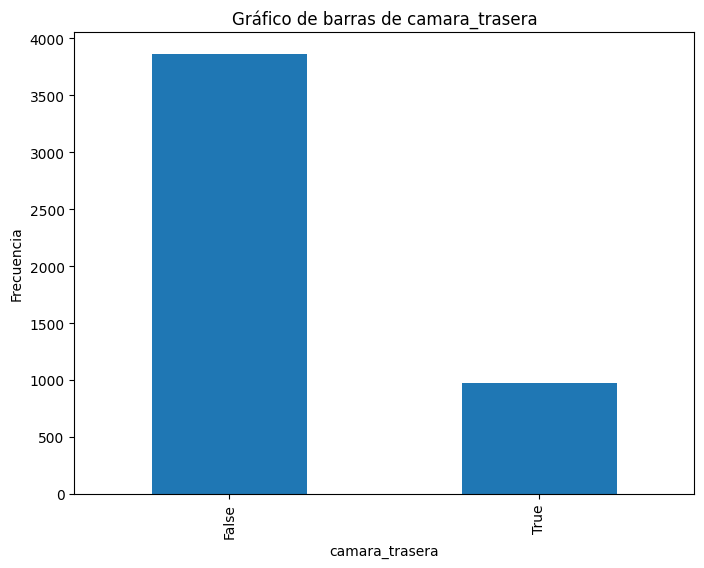

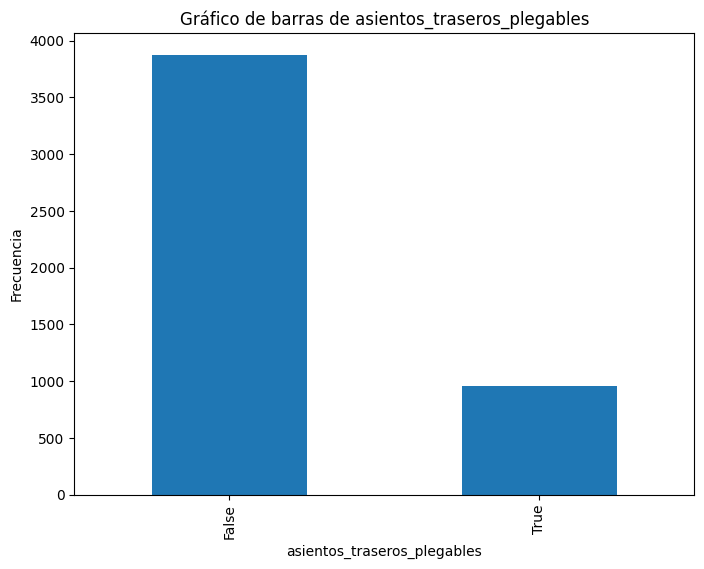

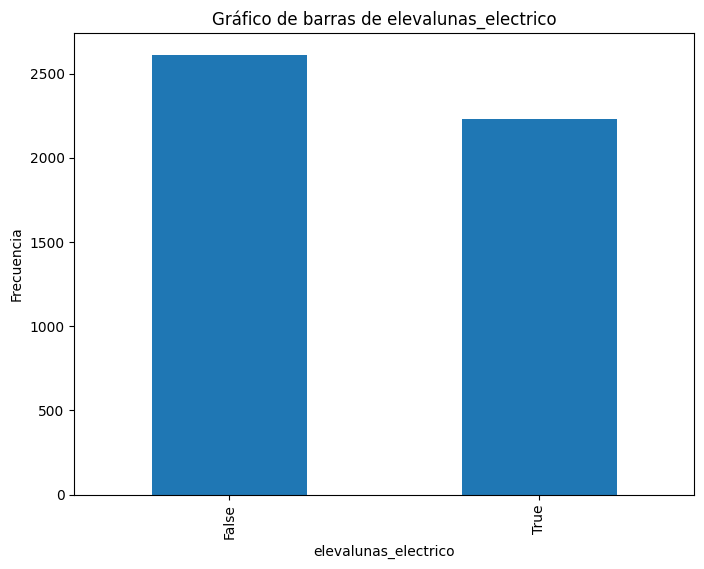

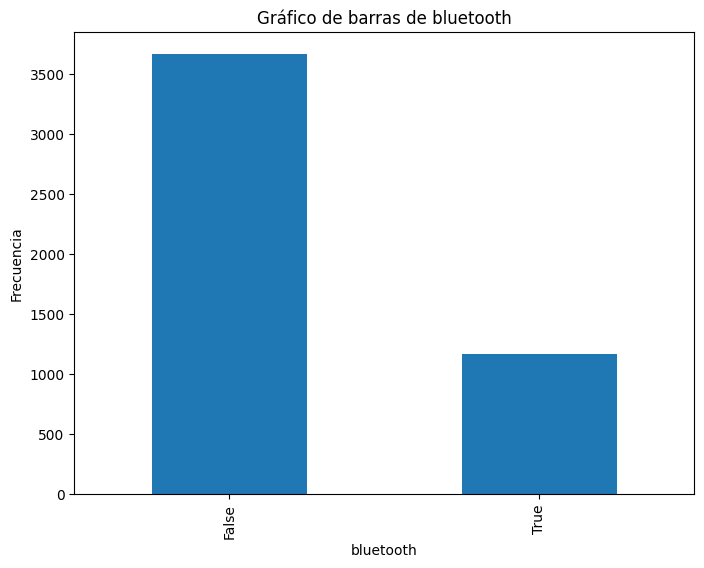

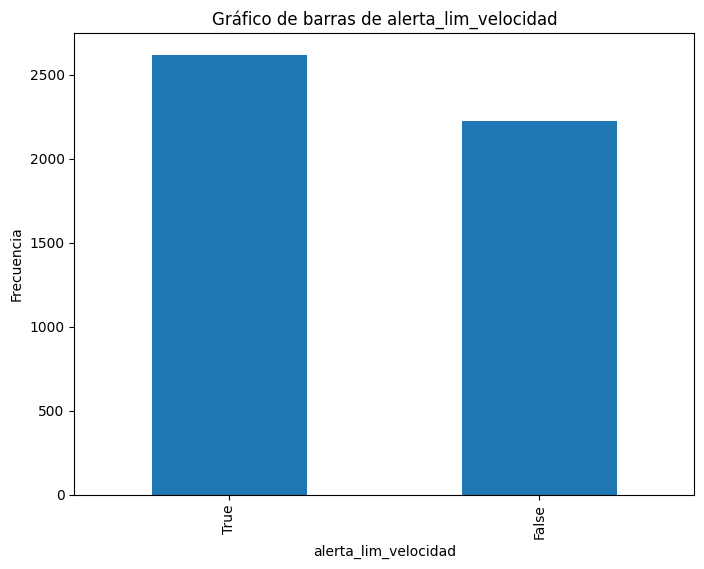

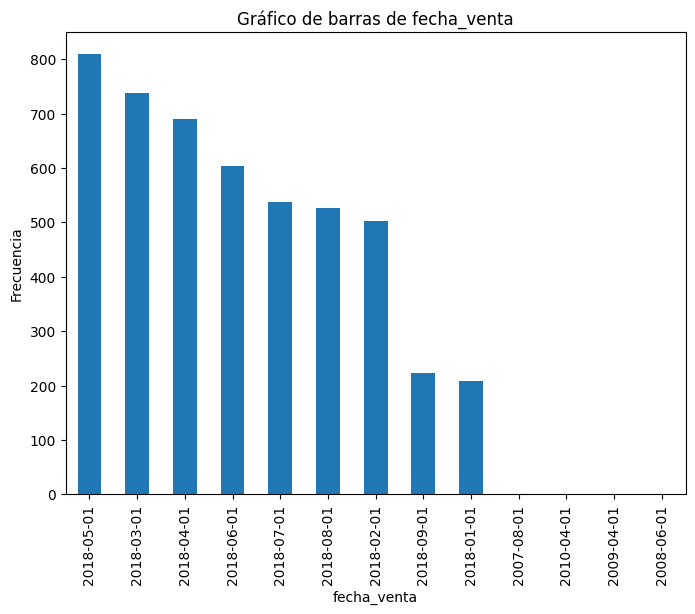

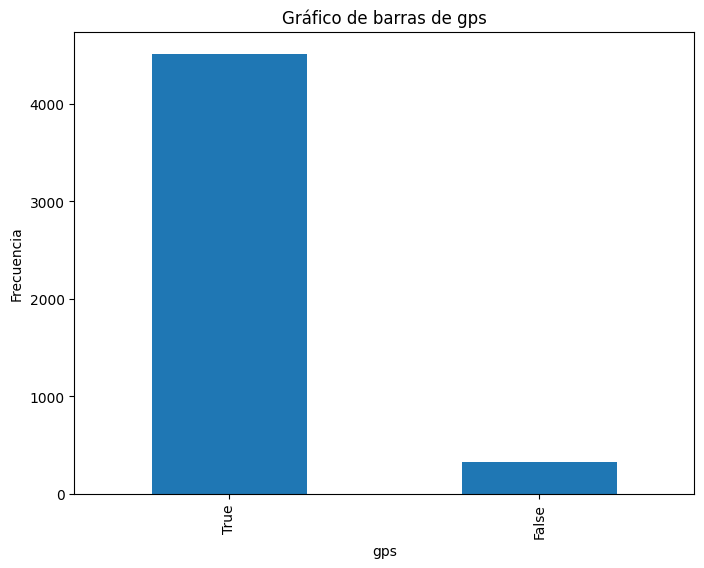

In [ ]:
def plot_variables(df):
    # Obtener listas de columnas por tipo de datos
    numeric_cols = df.select_dtypes(include=['int', 'float']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    boolean_cols = df.select_dtypes(include=['bool']).columns

    # Graficar variables numéricas
    for col in numeric_cols:
        plt.figure(figsize=(8, 6))
        plt.hist(df[col], bins=20)
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.title(f'Histograma de {col}')
        plt.show()

    # Graficar variables categóricas
    for col in categorical_cols:
        plt.figure(figsize=(8, 6))
        df[col].value_counts().plot(kind='bar')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.title(f'Gráfico de barras de {col}')
        plt.show()

    # Graficar variables booleanas
    for col in boolean_cols:
        plt.figure(figsize=(8, 6))
        df[col].value_counts().plot(kind='bar')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.title(f'Gráfico de barras de {col}')
        plt.show()



plot_variables(df)



Encontré varios problemas en el conjunto de datos:

Algunas columnas están almacenadas como objetos, pero deberían ser booleanas, ya que contienen valores de verdadero o falso. Las cambiaré a tipo booleano.

En el indicador mas rapido de encontrar anomalias es en el de describe porque hay encuentras lo mas recalcado de l dataset y encontre que en potencia y precio hay anomalias

Tambien cambiare el formato de las siguientes columnas a su formato apropiado fecha_registro,fecha_venta ya que estan de manera objeto y tinen que estar datetime     

La columna 'marca' no es necesaria y la eliminaré.

Crearé una nueva columna para calcular el tiempo que tarda un coche en venderse, analizando las fechas de registro y venta.

Revisaré si hay filas con valores nulos (sin información) y tomaré decisiones sobre cómo rellenarlos o eliminarlos, asegurándome de que no afecten los resultados.(regla si los datos son nulos mas del 10% de las entradas en tu variable tienes que ver como rellenarla o depende si tu infromacion es muy valiosa para borrar yo las borrare por efectos de aprendisaje

Eliminaré filas duplicadas si las hubiera.

En la columna 'modelo', hay demasiados modelos, por lo que los agruparé según un patrón establecido.


También encontré un nombre repetido en la columna de gasolinas, simplemente convertiré todo a minúsculas y me quedaré con el primer nombre para corregirlo.


In [ ]:
df['tipo_gasolina'].value_counts()

diesel           4631
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64

**LISTO !!!!**